In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from random import sample
import numpy as np
import math as math
import sklearn as sklearn
from sklearn import preprocessing, model_selection
import tensorflow as tf

## Load data into pandas Dataframes

In [2]:
with open('datasets/linear_data_from_gaussian.csv') as f:
    dataframe = pd.read_csv(f)
class_zero = dataframe[dataframe['label'] == 0]
class_one = dataframe[dataframe['label'] == 1]

## Plot data using pyplot

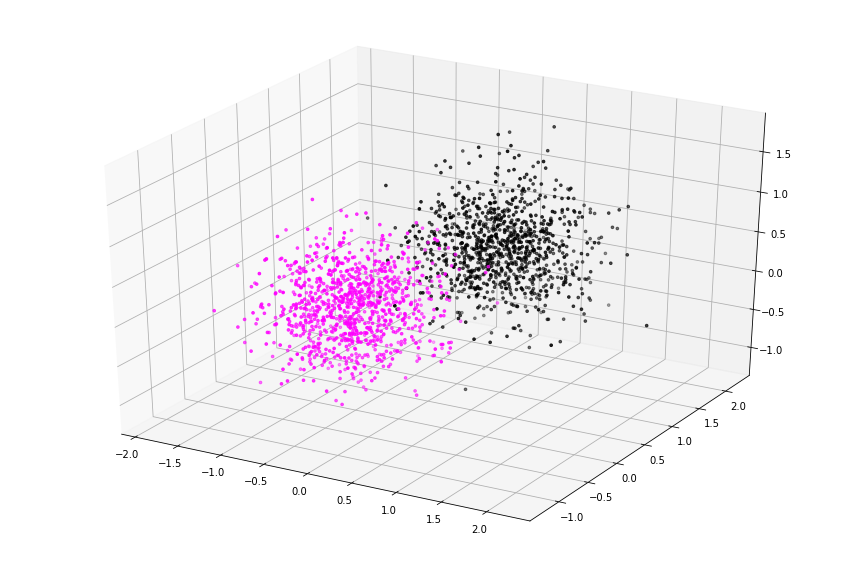

In [4]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(xs=class_zero['x'], ys=class_zero['y'], zs=class_zero['z'], s=7, c='fuchsia')
ax.scatter(xs=class_one['x'], ys=class_one['y'], zs=class_one['z'], s=7, c='black')

## Preprocess with sklearn

### Scale data to [0,1] range

In [5]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaled_df = dataframe.copy()
scaled_df[['x', 'y', 'z']] = scaler.fit_transform(dataframe[['x', 'y', 'z']])

### Split data into training and test sets

In [6]:
train_set_df, test_set_df, train_labels_df, test_labels_df = model_selection.train_test_split(
    scaled_df[['x','y','z']],
    scaled_df['label'], 
    test_size=0.2)

### Convert and transpose dataframes

In [7]:
train_set = np.array(train_set_df)
train_labels = np.array(train_labels_df)
test_set = np.array(test_set_df)
test_labels = np.array(test_labels_df)

## Das model - a shallow neural network

### Define a model in Tensorflow (Keras)

In [35]:
inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(inputs)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)

In [36]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.03, decay=1e-6), loss='binary_crossentropy', metrics=['accuracy'])

### Train the model

In [37]:
history = model.fit(train_set, train_labels, epochs=5, batch_size=32, verbose=0)

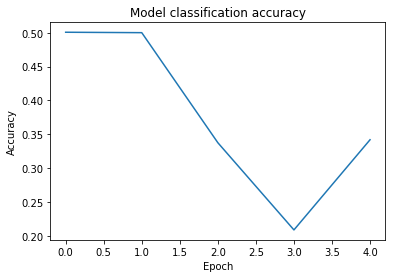

In [46]:
%matplotlib inline
plt.plot(history.history['acc'])
plt.title('Model classification accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [42]:
predictions = model.predict(test_set)
test_set_df['predicted'] = np.round(predictions).reshape(test_labels.shape)
test_set_df['label'] = test_labels
test_set_pred_zero = test_set_df[test_set_df['predicted'] == 0]
test_set_pred_one = test_set_df[test_set_df['predicted'] == 1]

<IPython.core.display.Javascript object>


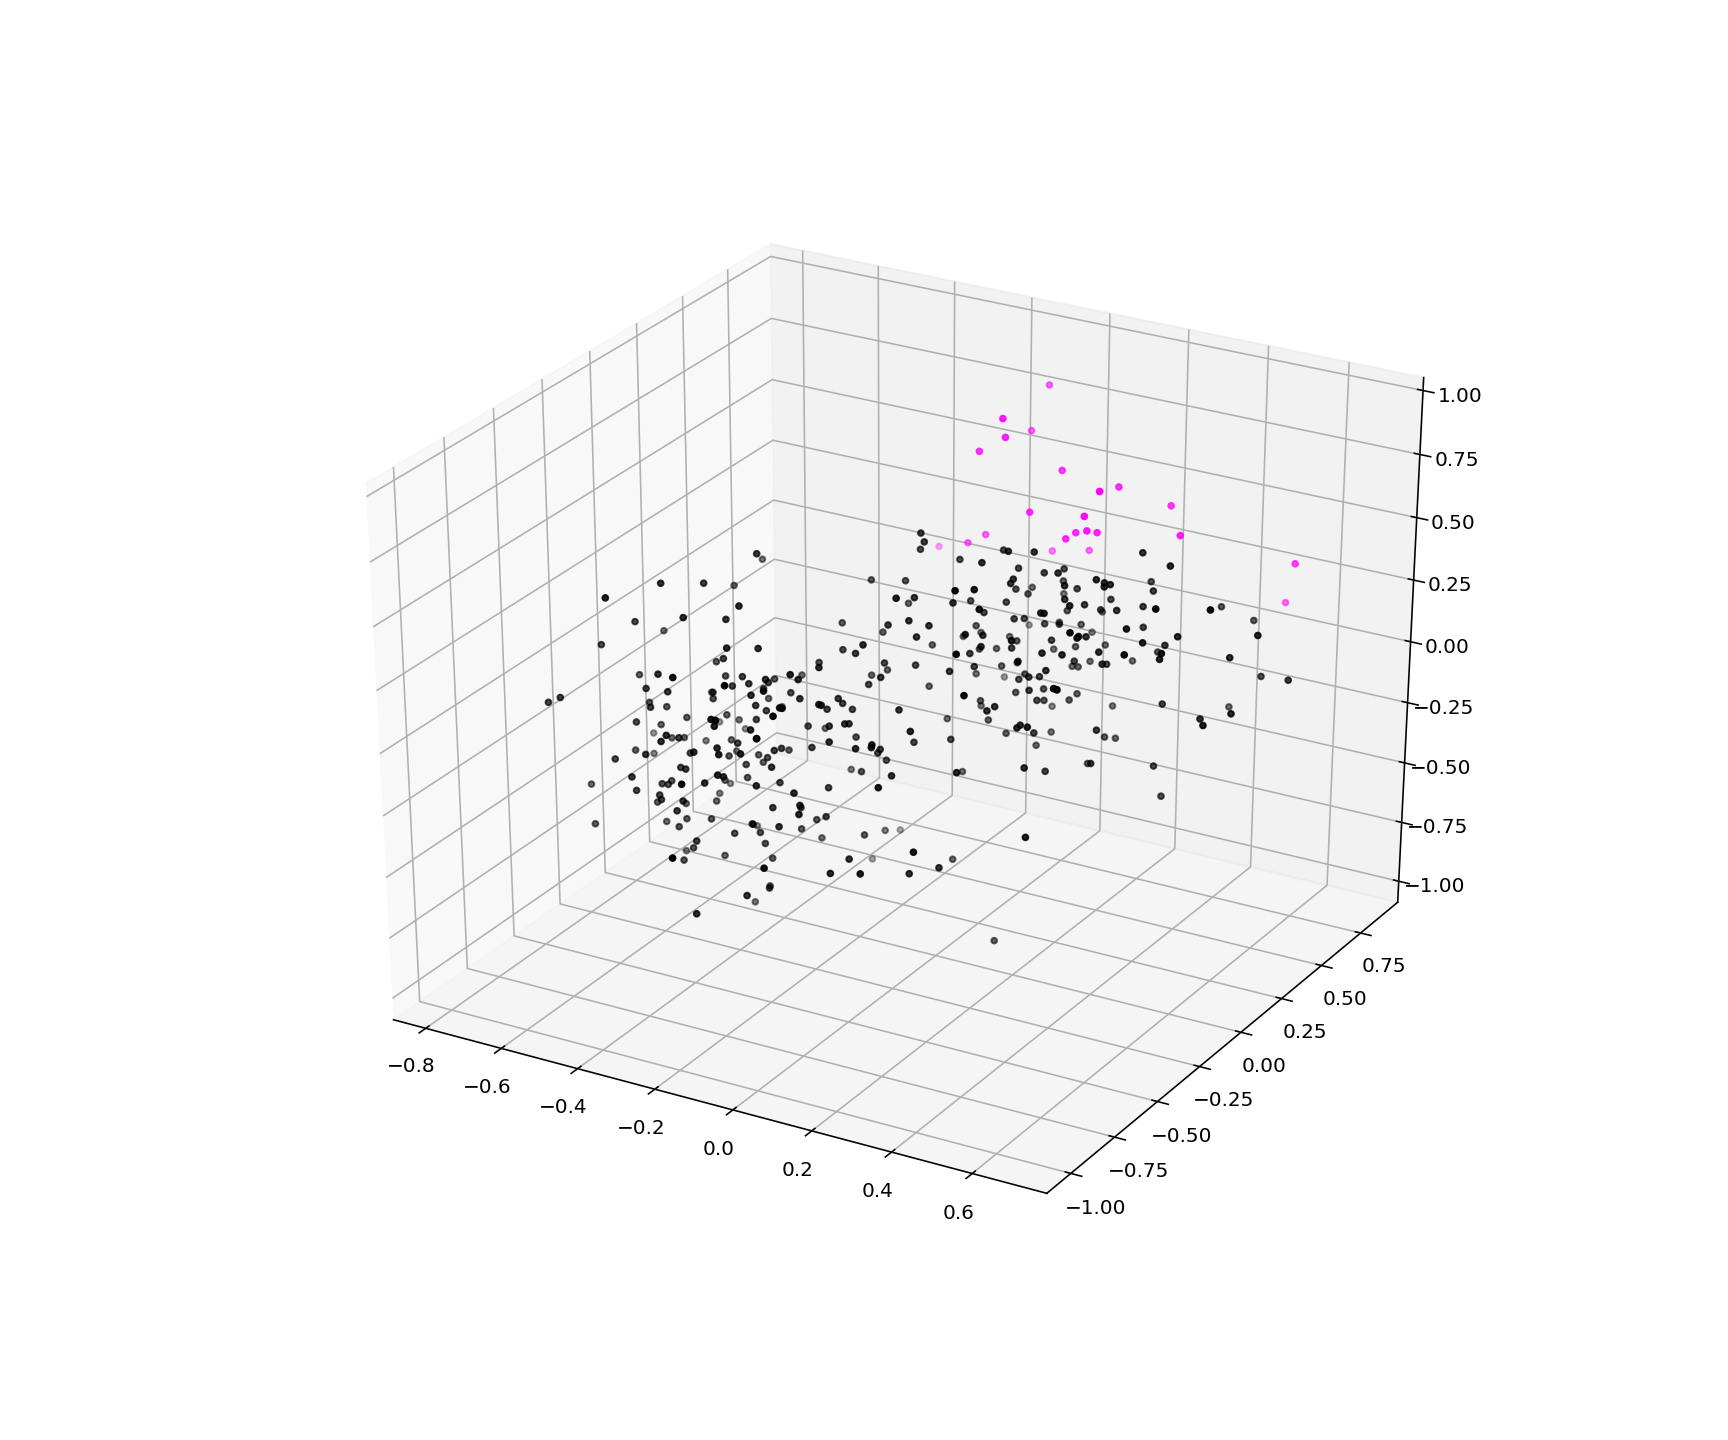

In [50]:
%matplotlib notebook
fig2 = plt.figure(figsize=(12,10))
ax2 = plt.axes(projection='3d')
ax2.scatter(test_set_pred_zero['x'], test_set_pred_zero['y'], test_set_pred_zero['z'], c='fuchsia', s=8)
ax2.scatter(test_set_pred_one['x'], test_set_pred_one['y'], test_set_pred_one['z'], c='black', s=8)
plt.show()